# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** Tifani Dea Shafira
- **Email:** tiffanidea14@gmail.com
- **ID Dicoding:** tifani_dea

## Menentukan Pertanyaan Bisnis

- Berapa banyak perentalan sepeda pada musim gugur (season:3) ?
- Berapa banyak jumlah pengguna terdaftar (registered) dalam sebulan ?

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Dari kode tersebut mengizinkan untuk mengakses dan mengelola dengan file yang disimpan di Google Drive dalam Google Colab dengan cara menghubungkan Google Drive ke Google Colab dan melakukan mounting (penyambungan) Drive ke direktori tertentu di sistem file Colab.

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Dari kode tersebut mengimpor library numpy (dengan alias np), pandas (dengan alias pd), matplotlib.pyplot (dengan alias plt), dan seaborn (dengan alias sns) untuk digunakan dalam analisis data.

## Data Wrangling

### Gathering Data

In [3]:
day_df = pd.read_csv("/content/drive/MyDrive/Bike-sharing-dataset/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Dari kode diatas digunakan untuk membaca file CSV dan data tersebut dimuat ke dalam dataframe yang disebut day_df.

In [4]:
hour_df = pd.read_csv("/content/drive/MyDrive/Bike-sharing-dataset/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Dari kode diatas digunakan untuk membaca file CSV dan data tersebut dimuat ke dalam dataframe yang disebut hour_df.

### Assessing Data

In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Dari kode diatas digunakan untuk menampilkan informasi tentang DataFrame day_df, termasuk jumlah baris dan kolom, nama dan tipe data setiap kolom, serta jumlah nilai non-null (non-kosong) di setiap kolom.

In [6]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Perintah tersebut menghitung jumlah nilai yang hilang dalam setiap kolom dari DataFrame day_df.

In [7]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


Perintah tersebut menghitung jumlah duplikasi dari DataFrame day_df.

In [8]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Perintah tersebut digunakan untuk memberikan ringkasan statistik deskriptif dari dataset, sehingga diperoleh gambaran umum tentang dataset, termasuk distribusi, rentang nilai, dan nilai tengah dari setiap kolom.

In [9]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Dari kode diatas digunakan untuk menampilkan informasi tentang DataFrame hour_df, termasuk jumlah baris dan kolom, nama dan tipe data setiap kolom, serta jumlah nilai non-null (non-kosong) di setiap kolom.

In [10]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Perintah tersebut menghitung jumlah nilai yang hilang dalam setiap kolom dari DataFrame hour_df.

In [11]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


Perintah tersebut menghitung jumlah duplikasi dari DataFrame hour_df.

In [12]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Perintah tersebut digunakan untuk memberikan ringkasan statistik deskriptif dari dataset, sehingga diperoleh gambaran umum tentang dataset, termasuk distribusi, rentang nilai, dan nilai tengah dari setiap kolom.

### Cleaning Data

In [13]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

Perintah diatas menjelaskan bahwa kolom-kolom tertentu dalam DataFrame day_df telah diubah menjadi tipe data datetime agar dapat diolah sebagai nilai tanggal dan waktu dalam analisis data.

In [14]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Perintah diatas memberikan informasi tentang struktur dan tipe data yang terdapat dalam DataFrame day_df dan setelah melakukan perubahan tipe data pada kolom 'dteday' maka telah berubah menjadi datetime.

In [15]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

Perintah diatas berfungsi untuk mengubah kolom-kolom tertentu dalam DataFrame hour_df pada kolom 'dteday' menjadi tipe data datetime.

In [16]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Perintah diatas memberikan informasi tentang struktur dan tipe data yang terdapat dalam DataFrame hour_df dan setelah melakukan perubahan tipe data pada kolom 'dteday' maka telah berubah menjadi datetime.

## Exploratory Data Analysis (EDA)

### Explore Data day_df

In [17]:
day_df.describe(include="all")

<ipython-input-17-51e59b52191b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include="all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


Perintah diatas memberikan gambaran lengkap tentang ringkasan statistik yang mencakup informasi tambahan untuk kolom non-numerik, seperti jumlah nilai unik (unique), nilai yang paling sering muncul (top), dan frekuensi kemunculan nilai yang paling sering muncul (freq).

In [18]:
day_df.instant.is_unique

True

Perintah diatas digunakan untuk memeriksa apakah semua nilai dalam kolom "instant" dari DataFrame day_df unik atau tidak. Jika nilai yang dikembalikan adalah True, itu berarti setiap nilai dalam kolom "instant" adalah unik, tidak ada duplikasi.

In [19]:
day_df.groupby(by="dteday").agg({
    "instant":"nunique",
    "mnth":["max", "min", "mean", "std"]
})

instant mnth              
           nunique  max min  mean std
dteday                               
2011-01-01       1    1   1   1.0 NaN
2011-01-02       1    1   1   1.0 NaN
2011-01-03       1    1   1   1.0 NaN
2011-01-04       1    1   1   1.0 NaN
2011-01-05       1    1   1   1.0 NaN
...            ...  ...  ..   ...  ..
2012-12-27       1   12  12  12.0 NaN
2012-12-28       1   12  12  12.0 NaN
2012-12-29       1   12  12  12.0 NaN
2012-12-30       1   12  12  12.0 NaN
2012-12-31       1   12  12  12.0 NaN

[731 rows x 5 columns]

Perintah diatas digunakna untuk memberikan informasi statistik tentang jumlah nilai unik "instant" dan statistik agregat untuk "mnth" dalam setiap tanggal yang ada dalam DataFrame day_df.

In [20]:
day_df.groupby(by="windspeed").instant.nunique().sort_values(ascending=False)

windspeed
0.106350    3
0.166667    3
0.136817    3
0.149883    3
0.110700    3
           ..
0.157963    1
0.157971    1
0.157975    1
0.158330    1
0.507463    1
Name: instant, Length: 650, dtype: int64

Perintah ini mengelompokkan data dalam DataFrame day_df berdasarkan nilai dalam kolom 'windspeed' kemudian, dihitung jumlah nilai unik dari kolom 'instant' untuk setiap kelompok 'windspeed'dan hasilnya diurutkan secara menurun (descending) berdasarkan jumlah unik.

In [21]:
day_df.groupby(by="season").instant.nunique().sort_values(ascending=False)

season
3    188
2    184
1    181
4    178
Name: instant, dtype: int64

Perintah ini mengelompokkan data dalam day_df berdasarkan musim (season), kemudian menghitung jumlah unik dari kolom 'instant' untuk setiap musim. Selanjutnya, hasilnya diurutkan secara menurun (descending).

In [22]:
rental_per_date = day_df.groupby('dteday')['cnt'].sum()
tanggal_sewa = rental_per_date.idxmax()
print("Tanggal dengan penyewaan terbanyak :", tanggal_sewa)

Tanggal dengan penyewaan terbanyak : 2012-09-15 00:00:00


Perintah diatas menghitung jumlah total penyewaan sepeda pada setiap tanggal, kemudian menemukan tanggal di mana jumlah penyewaan sepeda terbanyak.

In [23]:
#Berapa banyak perentalan sepeda pada musim gugur (season:3) ?
jumlah_perentalan_season_3 = day_df[day_df['season'] == 3]['cnt'].sum()
print("Jumlah perentalan sepeda pada musim gugur/season 3 adalah: ", jumlah_perentalan_season_3)

Jumlah perentalan sepeda pada musim gugur/season 3 adalah:  1061129


Dari hasil output diatas menampilkan jumlah perentalan pada musim gugur dengan mengambil data dari DataFrame "day_df" dari kolom season yang tertuju pada season 3 atau musim gugur serta berdasarkan kolom "cnt"

In [24]:
#Berapa banyak jumlah pengguna terdaftar (registered) dalam sebulan ?
registered_per_month = day_df.groupby('mnth')['registered'].sum()
print("Jumlah pengguna terdaftar/registered perbulan : ", registered_per_month)

Jumlah pengguna terdaftar/registered perbulan :  mnth
1     122891
2     136389
3     184476
4     208292
5     256401
6     272436
7     266791
8     279155
9     275668
10    262592
11    218228
12    189343
Name: registered, dtype: int64


Dari hasil output diatas dapat mencetak jumlah pengguna yang sudah terdaftar untuk tiap bulannya dengan mengelompokkan data berdasarkan bulan / "mnth", lalu menjumlahkan jumlah pengguna terdaftar/registered.


#Explory Data hour_df



In [25]:
hour_df.describe(include="all")

<ipython-input-25-55b8ff84265d>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  hour_df.describe(include="all")


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000


Perintah diatas memberikan gambaran lengkap tentang ringkasan statistik yang mencakup informasi tambahan untuk kolom non-numerik, seperti jumlah nilai unik (unique), nilai yang paling sering muncul (top), dan frekuensi kemunculan nilai yang paling sering muncul (freq).

In [26]:
hour_df.instant.is_unique

True

Perintah diatas digunakan untuk memeriksa apakah semua nilai dalam kolom "instant" dari DataFrame hour_df unik atau tidak. Jika nilai yang dikembalikan adalah True, itu berarti setiap nilai dalam kolom "instant" adalah unik, tidak ada duplikasi.

In [27]:
hour_df.groupby(by="hr").agg({
    "instant": "nunique",
    "cnt": "sum",
    "holiday":  ["min", "max"]
})

instant     cnt holiday    
   nunique     sum     min max
hr                            
0      726   39130       0   1
1      724   24164       0   1
2      715   16352       0   1
3      697    8174       0   1
4      697    4428       0   1
5      717   14261       0   1
6      725   55132       0   1
7      727  154171       0   1
8      727  261001       0   1
9      727  159438       0   1
10     727  126257       0   1
11     727  151320       0   1
12     728  184414       0   1
13     729  184919       0   1
14     729  175652       0   1
15     729  183149       0   1
16     730  227748       0   1
17     730  336860       0   1
18     728  309772       0   1
19     728  226789       0   1
20     728  164550       0   1
21     728  125445       0   1
22     728   95612       0   1
23     728   63941       0   1

Perintah diatas melakukan pengelompokkan data pada DataFrame hour_df berdasarkan jam (hr), kemudian menerapkan beberapa fungsi agregasi pada kolom 'instant', 'cnt', 'holiday'.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Berapa banyak perentalan sepeda pada musim gugur (season:3) ?

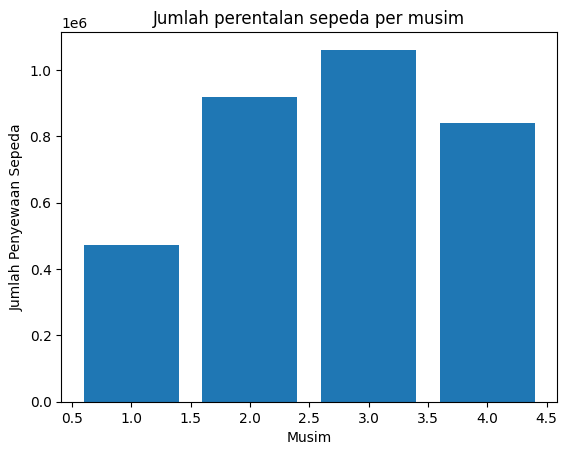

In [28]:
jumlah_perentalan_season = day_df.groupby('season')['cnt'].sum()
plt.bar(jumlah_perentalan_season.index, jumlah_perentalan_season.values)

plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.title('Jumlah perentalan sepeda per musim')

plt.show()

Dari bar chart diatas memberikan tampilan untuk membandingkan tiap semua musim dan hasil yang ditampilkan dominan pada musim gugur.

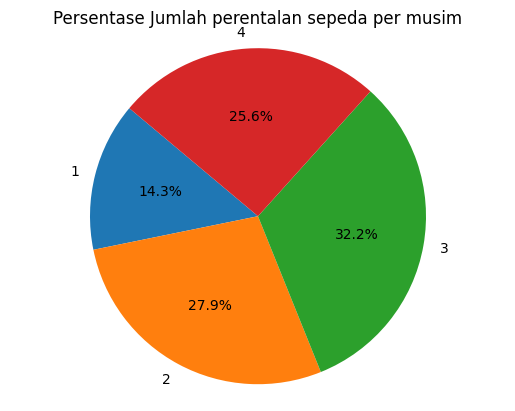

In [29]:
jumlah_perentalan_season = day_df.groupby('season')['cnt'].sum()
plt.pie(jumlah_perentalan_season, labels=jumlah_perentalan_season.index, autopct='%1.1f%%', startangle=140)

plt.title('Persentase Jumlah perentalan sepeda per musim')

plt.axis('equal')
plt.show()

Pie chart yang ditampilkan memberikan persentase pada tiap musim dan hasilnya dominan pada musim gugur dengan persentase 32.2%.

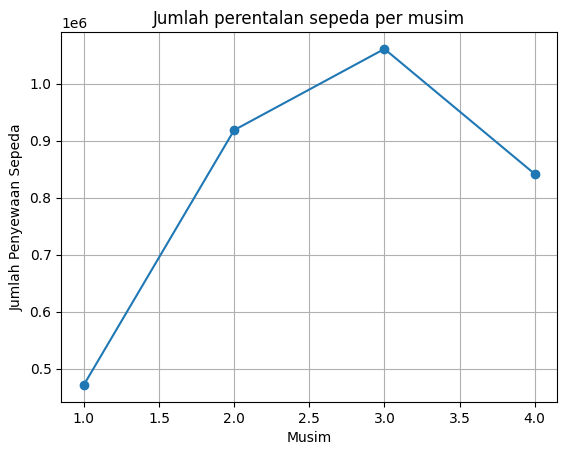

In [30]:
jumlah_perentalan_season = day_df.groupby('season')['cnt'].sum()
plt.plot(jumlah_perentalan_season.index, jumlah_perentalan_season.values, marker='o', linestyle='-')

plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.title('Jumlah perentalan sepeda per musim')

plt.grid(True)
plt.show()

Dari line chart diatas memberikan tampilan untuk membandingkan tiap semua musim dan hasil yang ditampilkan dominan pada musim gugur atau season 3.

In [31]:
rfm_data = day_df[['instant', 'dteday', 'cnt']]

# Hitung Recency, Frequency, dan Monetary
# Recency: Hitung jumlah hari antara tanggal terbaru dan tanggal saat ini (instant)
recency_data = day_df.groupby('instant')['dteday'].max().reset_index()
recency_data['recency'] = (day_df['dteday'].max() - recency_data['dteday']).dt.days

# Frequency: Hitung jumlah transaksi per pelanggan
frequency_data = day_df.groupby('instant')['cnt'].count().reset_index()
frequency_data.rename(columns={'cnt': 'frequency'}, inplace=True)

# Monetary: Jumlah total pembelian per pelanggan
monetary_data = day_df.groupby('instant')['cnt'].sum().reset_index()
monetary_data.rename(columns={'cnt': 'monetary'}, inplace=True)

# Gabungkan hasil perhitungan
rfm_analysis = pd.merge(recency_data[['instant', 'recency']], frequency_data, on='instant')
rfm_analysis = pd.merge(rfm_analysis, monetary_data, on='instant')

# Tampilkan hasil RFM Analysis
print(rfm_analysis)

     instant  recency  frequency  monetary
0          1      730          1       985
1          2      729          1       801
2          3      728          1      1349
3          4      727          1      1562
4          5      726          1      1600
..       ...      ...        ...       ...
726      727        4          1      2114
727      728        3          1      3095
728      729        2          1      1341
729      730        1          1      1796
730      731        0          1      2729

[731 rows x 4 columns]


<ipython-input-35-54509a79eb25>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=rfm_df['recency'], x=rfm_df.index, palette=colors, ax=ax[0])
<ipython-input-35-54509a79eb25>:17: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(y=rfm_df['recency'], x=rfm_df.index, palette=colors, ax=ax[0])
<ipython-input-35-54509a79eb25>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=rfm_df['frequency'], x=rfm_df.index, palette=colors, ax=ax[1])
<ipython-input-35-54509a79eb25>:23: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(y=rfm_df['frequency'], x=rfm_df.index, palette=colors, 

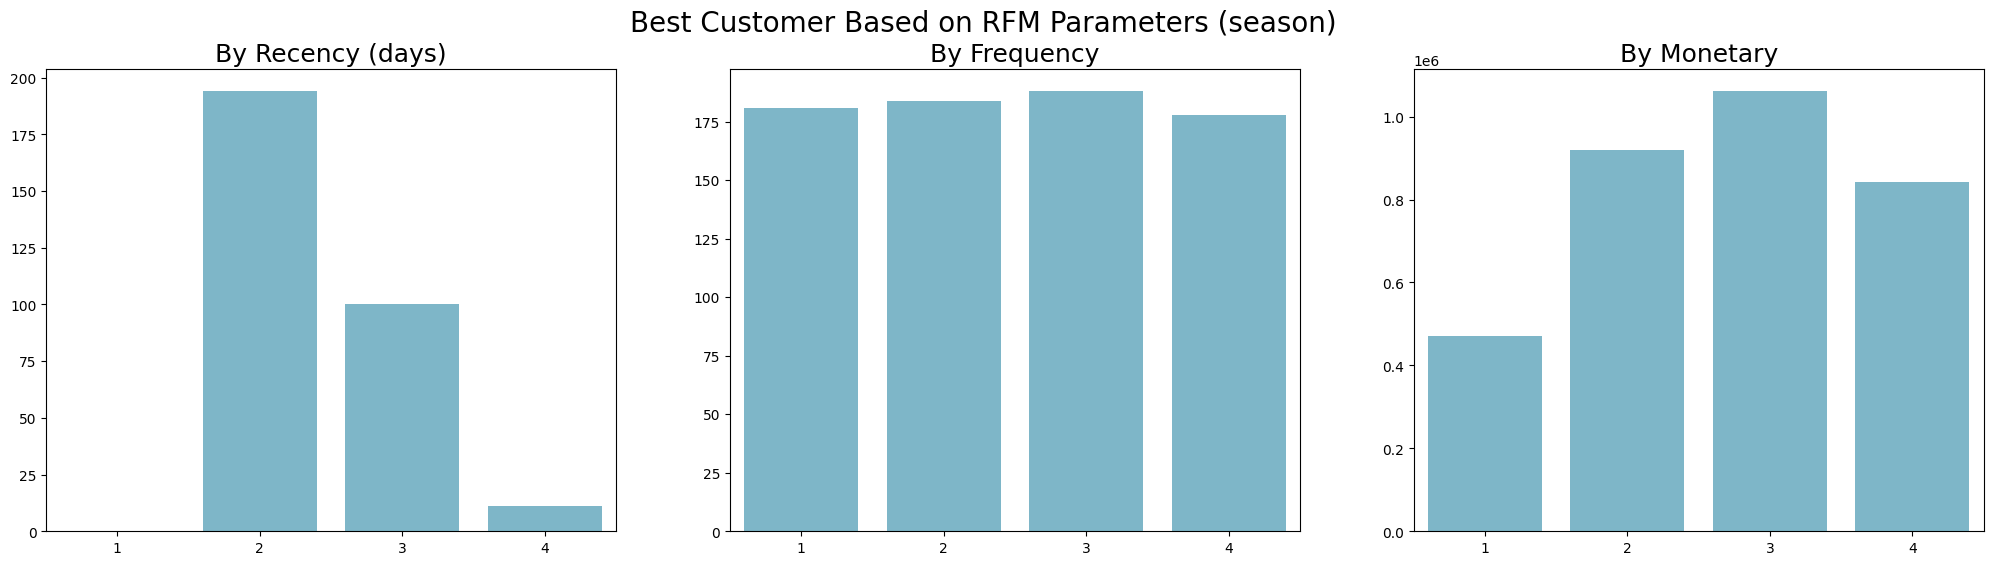

In [35]:
# Hitung recency, frequency, dan monetary dari DataFrame day_df
recency = day_df.groupby('season')['dteday'].max()
recency = (day_df['dteday'].max() - recency).dt.days

frequency = day_df.groupby('season').size()

monetary = day_df.groupby('season')['cnt'].sum()

# Gabungkan hasil-hasil perhitungan RFM menjadi sebuah DataFrame
rfm_df = pd.DataFrame({'recency': recency, 'frequency': frequency, 'monetary': monetary})

# Plotting RFM Analisis
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(25, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y=rfm_df['recency'], x=rfm_df.index, palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis='x', labelsize=10)

sns.barplot(y=rfm_df['frequency'], x=rfm_df.index, palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=10)

sns.barplot(y=rfm_df['monetary'], x=rfm_df.index, palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=10)

plt.suptitle("Best Customer Based on RFM Parameters (season)", fontsize=20)
plt.show()

Dari bar plot yang ditampilkan diatas terdapat subplot Recency. subplot Frequency, dan subplot Monetary. Subplot Recency dihitung dengan mengelompokkan data berdasarkan musim dan kemudian mencari tanggal terakhir setiap grup musim. Subplot Frequency dihitung dengan menghitung jumlah entri data dalam setiap grup musim. Subplot Monetary dihitung dengan menjumlahkan nilai dalam kolom 'cnt' (jumlah peminjaman sepeda) dalam setiap grup musim.

### Pertanyaan 2: Berapa banyak jumlah pengguna terdaftar (registered) dalam sebulan ?

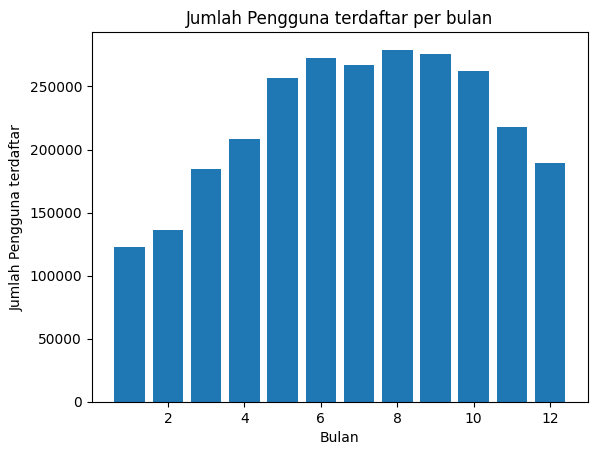

In [33]:
registered_per_month = day_df.groupby('mnth')['registered'].sum()
plt.bar(registered_per_month.index, registered_per_month.values)

plt.xlabel('Bulan')
plt.ylabel('Jumlah Pengguna terdaftar')
plt.title('Jumlah Pengguna terdaftar per bulan')

plt.show()

Dari bar chart diatas memberikan tampilan untuk membandingkan tiap bulan untuk pelanggan terdaftar dan hasil yang ditampilkan dominan pada bulan ke - 8.

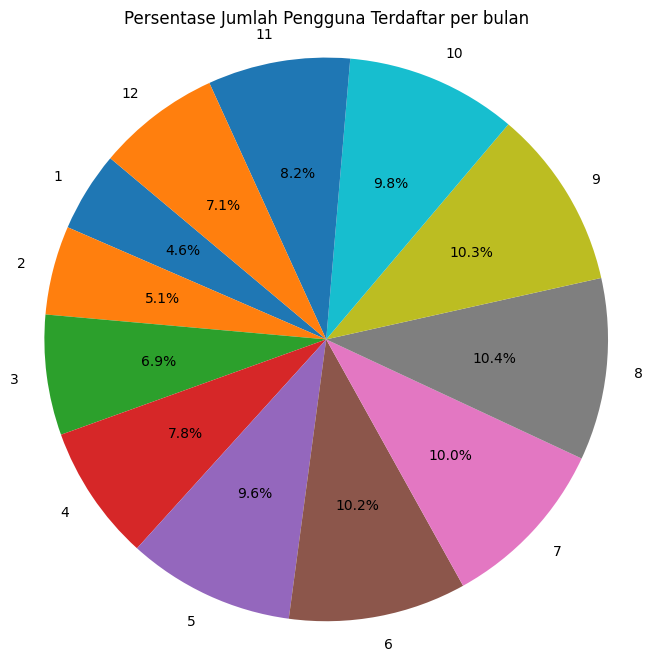

In [36]:
registered_per_month = day_df.groupby('mnth')['registered'].sum()

plt.figure(figsize=(8, 8))
plt.pie(registered_per_month, labels=registered_per_month.index, autopct='%1.1f%%', startangle=140)

plt.title('Persentase Jumlah Pengguna Terdaftar per bulan')

plt.axis('equal')

plt.show()

Pie chart yang ditampilkan memberikan persentase pada tiap bulan dan hasilnya dominan pada bulan ke - 8 dengan persentase 10.4%.

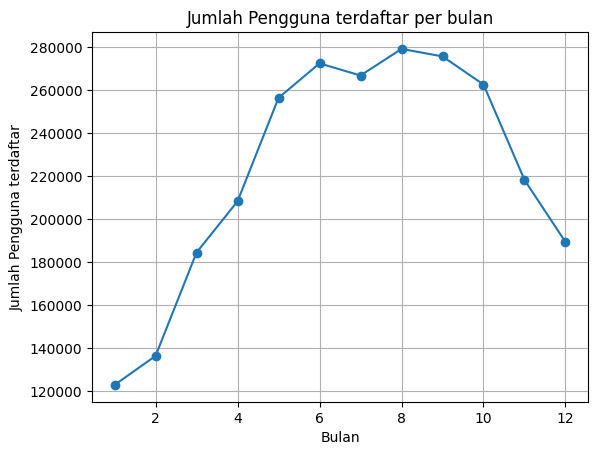

In [37]:
registered_per_month = day_df.groupby('mnth')['registered'].sum()
plt.plot(registered_per_month.index, registered_per_month.values, marker='o', linestyle='-')

plt.xlabel('Bulan')
plt.ylabel('Jumlah Pengguna terdaftar')
plt.title('Jumlah Pengguna terdaftar per bulan')

plt.grid(True)
plt.show()

Dari line chart diatas memberikan tampilan untuk membandingkan tiap bulan dan hasil yang ditampilkan dominan pada bulan ke-8 dengan hasil 280000.

In [38]:
recency_data = day_df.groupby('registered')['dteday'].max()
current_date = day_df['dteday'].max()
recency_data = (current_date - recency_data).dt.days

# Frequency: Menghitung jumlah transaksi yang dilakukan oleh pelanggan
frequency_data = day_df.groupby('registered').size()

# Monetary: Menghitung total pengeluaran oleh pelanggan
monetary_data = day_df.groupby('registered')['cnt'].sum()

# Membuat DataFrame untuk RFM Analysis
rfm_data = pd.DataFrame({
    'Recency': recency_data,
    'Frequency': frequency_data,
    'Monetary': monetary_data
})

# Menampilkan hasil RFM Analysis
print(rfm_data)

            Recency  Frequency  Monetary
registered                              
20               63          1        22
416             704          1       431
432               5          1       441
451             372          1       754
472             705          1       506
...             ...        ...       ...
6844             89          1      7572
6898             68          1      7693
6911             82          1      7691
6917            101          1      8167
6946             96          1      7733

[679 rows x 3 columns]


<ipython-input-39-8bdee02496be>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="mnth", x="recency", data=day_df.groupby('mnth')['recency'].min().reset_index().sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
<ipython-input-39-8bdee02496be>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="mnth", x="frequency", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
<ipython-input-39-8bdee02496be>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="mnth", x="monetary", d

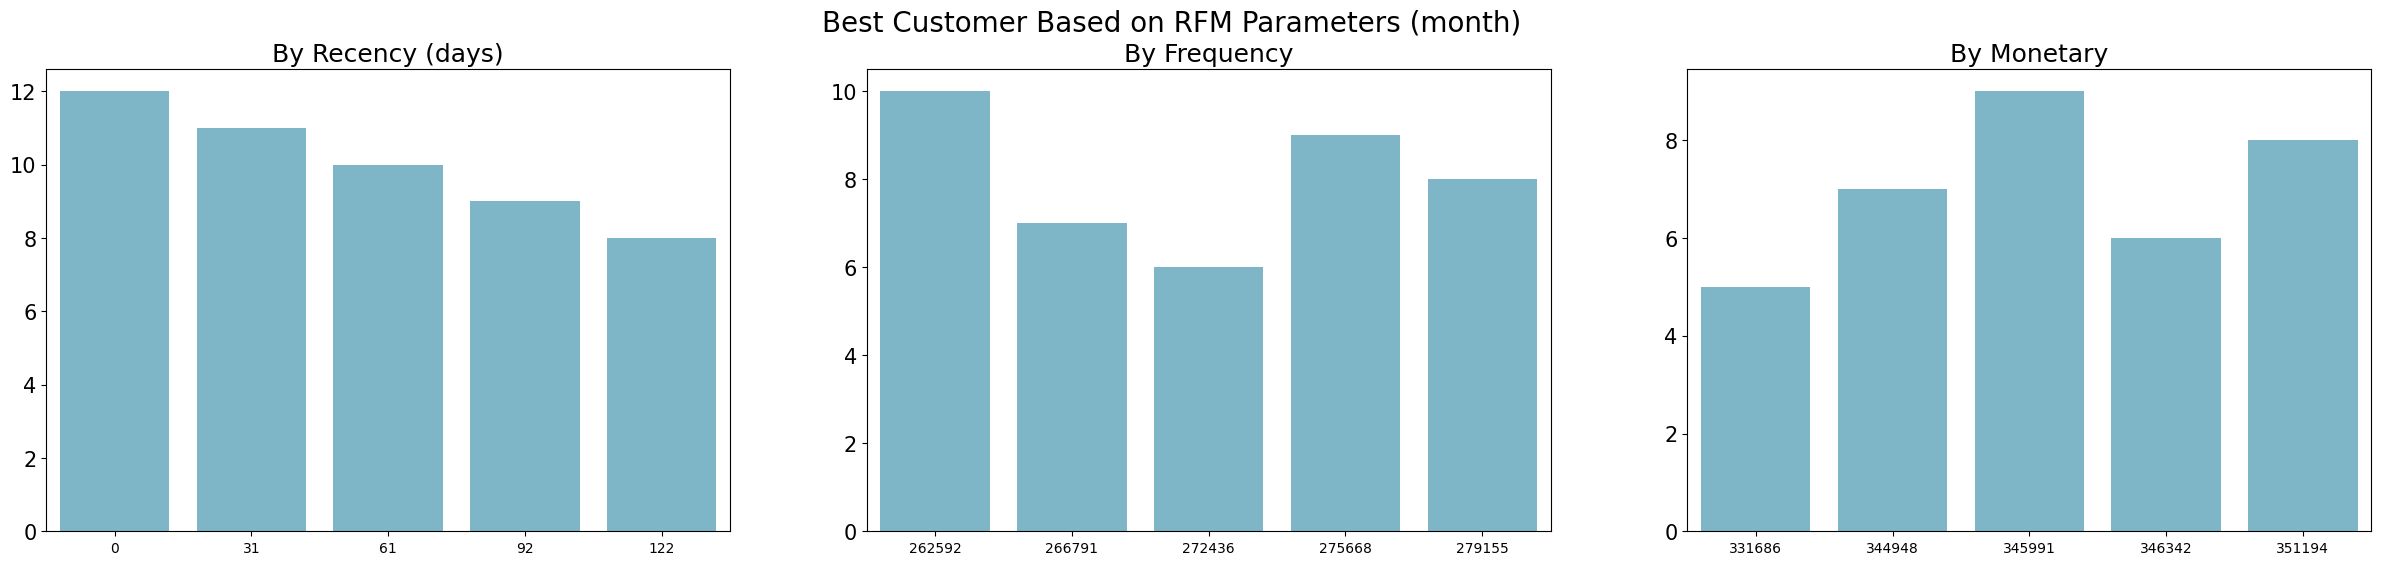

In [39]:
# 1. Menghitung RFM
# Recency
latest_date = day_df['dteday'].max()
day_df['recency'] = (latest_date - day_df['dteday']).dt.days

# Frequency: Jumlah total pendaftaran (registered) per bulan
registered_per_month = day_df.groupby('mnth')['registered'].sum().reset_index()
registered_per_month.columns = ['mnth', 'frequency']

# Monetary: Jumlah total pengeluaran (cnt) per bulan
monetary_per_month = day_df.groupby('mnth')['cnt'].sum().reset_index()
monetary_per_month.columns = ['mnth', 'monetary']

# 2. Visualisasi RFM
rfm_df = registered_per_month.merge(monetary_per_month, on='mnth')

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

# Visualisasi Recency
sns.barplot(y="mnth", x="recency", data=day_df.groupby('mnth')['recency'].min().reset_index().sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis='y', labelsize=15)

# Visualisasi Frequency
sns.barplot(y="mnth", x="frequency", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

# Visualisasi Monetary
sns.barplot(y="mnth", x="monetary", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='y', labelsize=15)

plt.suptitle("Best Customer Based on RFM Parameters (month)", fontsize=20)
plt.show()

Dari bar plot diatas terdapat subplot Recency, subplot Frequency, subplot Monetary. Subplot pertama menampilkan visualisasi "Recency" dengan menggunakan bar plot. Data yang digunakan adalah lima bulan dengan nilai Recency terendah, yang diurutkan berdasarkan nilai Recency secara menaik.
Subplot kedua menampilkan visualisasi "Frequency" dengan menggunakan bar plot. Data yang digunakan adalah lima bulan dengan nilai Frequency tertinggi.
Subplot ketiga menampilkan visualisasi "Monetary" dengan menggunakan bar plot. Data yang digunakan adalah lima bulan dengan nilai Monetary tertinggi.

In [40]:
# Menggabungkan dua DataFrame berdasarkan kolom 'instant'
merged_df = pd.concat([hour_df, day_df], ignore_index=True)

# Menampilkan DataFrame yang telah digabungkan
print(merged_df)

       instant     dteday  season  yr  mnth   hr  holiday  weekday  \
0            1 2011-01-01       1   0     1  0.0        0        6   
1            2 2011-01-01       1   0     1  1.0        0        6   
2            3 2011-01-01       1   0     1  2.0        0        6   
3            4 2011-01-01       1   0     1  3.0        0        6   
4            5 2011-01-01       1   0     1  4.0        0        6   
...        ...        ...     ...  ..   ...  ...      ...      ...   
18105      727 2012-12-27       1   1    12  NaN        0        4   
18106      728 2012-12-28       1   1    12  NaN        0        5   
18107      729 2012-12-29       1   1    12  NaN        0        6   
18108      730 2012-12-30       1   1    12  NaN        0        0   
18109      731 2012-12-31       1   1    12  NaN        0        1   

       workingday  weathersit      temp     atemp       hum  windspeed  \
0               0           1  0.240000  0.287900  0.810000   0.000000   
1          

Perintah diatas menggabungkan dua DataFrame, yaitu hour_df dan day_df, menjadi satu DataFrame yang disebut merged_df berdasarkan kolom 'instant'. Data dari kedua DataFrame tersebut digabungkan berdasarkan urutan yang diatur oleh 'instant'.

In [41]:
merged_df.to_csv("merged_df.csv", index=False)

Perintah diatas digunakan untuk menyimpan DataFrame merged_df ke dalam format file CSV dengan nama merged_df.csv.

## Conclusion

- Conclution pertanyaan 1
-> Untuk menjawab pertanyaan yang saya ajukan dapat diambil kesimpulan bahwa kita dapat memberikan gambaran tentang seberapa banyak sepeda yang disewakan pada musim gugur dan bagaimana proporsi ini dibandingkan dengan musim lainnya, menggunakan kedua jenis visualisasi data tersebut. Dengan menggunakan bar chart dapat menunjukkan jumlah perentalan sepeda secara lebih langsung, memungkinkan perbandingan yang lebih mudah antara jumlah perentalan sepeda pada musim gugur dan musim lainnya. Sedangkan pie chart dapat memberikan gambaran visual yang langsung tentang proporsi perentalan sepeda pada setiap musim.

- Conclution pertanyaan 2
-> Dari pertanyaan yang saya ajukan dapat diambil kesimpulan bahwa kita dapat melihat jumlah pengguna terdaftar di setiap bulannya melalui jawaban yang telah saya tampilkan sebelumnya pada bagian Exploratory Data Analisis serta visualisasi pie chart memberikan persentase kontribusi setiap bulan terhadap jumlah total pengguna terdaftar selama periode yang diamati, sedangkan bar chart menunjukkan perbandingan langsung antara jumlah pengguna terdaftar di setiap bulan dengan menggunakan kedua jenis visualisasi tersebut memudahkan kita dalam membaca dan membandingkan jumlah pengguna terdaftar tiap bulannya.
